# 연속형 확률 변수

## 연속형 확률 변수

- 확률 변수가 취할 수 있는 값이 연속적인 확률 변수
- 특정 값을 취하는 확률은 정의되지 않는다.
- 확률 변수가 어느 구간에 들어가는가에 대한 확률을 정의

- [예] 룰렛 :
    - 취할 수 있는 값이 0부터 1사이의 실수
    - 큰 수 일수록 나오기 쉬워지는 불공정한 구조
    - 0.5 라는 값을 취할 확률 0
    - 정확하게 0.50000000... 을 취할 가능성을 없으므로 확률은 0
    

### 확률 밀도 함수

- 확률 변수가 취할 수 있는 값은 구간[a, b]
- 확률 밀도함수(PDF) 또는 밀도함수 f(x) 로 정의

- 어떤 특정 값을 취하는 확률로는 정의되지 않음
    - 𝑓(𝑥) ≠𝑃(𝑋=𝑥)
![](pic/밀도적분.png)

- 이 적분은 밀도함수 f(x)와 x축 그리고 두 직선 x=x0, x=x1으로 둘러싸인 영역의 면적으로 해설할 수 있고 그림에서 칠해진 면적이 확률 P 임


### 불공정한 룰렐을 예로 들어 코드를 구현

- [예] 룰렛 :
    - 취할 수 있는 값이 0부터 1사이의 실수
    - 큰 수일수록 나오기 쉬워지는 불공정한 구조
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline


In [3]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [5]:
# 취할 수 있는 값의 구간을 정의
x_range = np.array([0,1])

- x_range 를 정의역으로 하는 밀도 함수를 구현
    - 불공정한 룰렛은 큰 값일수록 나오기 쉽기 때문에 아래와 같은 밀도함수로 정의
    ![](pic/룰렛밀도함수.png)

In [7]:
def f(x) :
    if x_range[0] <= x <= x_range[1] :
        return 2 * x
    else : 
        return 0


In [8]:
f(0.4) # 이 식은 0.4가 나올 확률이 아니다
# 연속형 이므로 두 구간 경계 위치값을 함수를 통해 구해 면적을 그린 후 해당 면적을 적분으로 구하면
# 반환되ㅑ는 값이 두 구간 범위의 확률이 된다.


0.800

In [9]:
# 확률 변수 x를 정의
X = [x_range, f]

- 위에서 작성한 밀도함수 f(x)를 그래프로 그림
    - 확률의 이미지를 쉽게 전달하기위해 f(x)와 x축, 두 직선=0.4, x=0.6의 영역에 색을 적용
    - (불공정한 룰렛이 0.4부터 0.6사이의 값을 취할 확률)


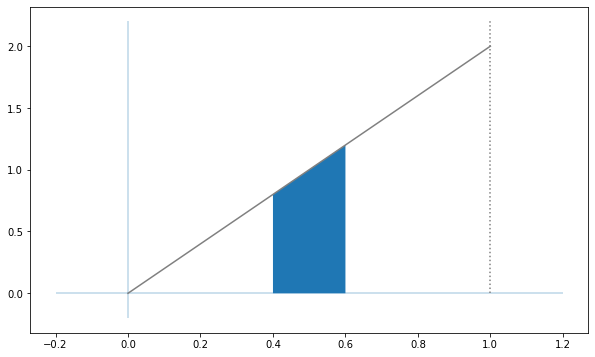

In [14]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 확률함수 그래프
ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')

#ax.hlines(y, xmin, xmax, alpha=)
ax.hlines(0, -0.2, 1.2, alpha=0.3)

#ax.vlines(x, ymin, ymax, alpha=)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')


# 0.4 부터 0.6 까지 x 좌표를 준비
xs_p = np.linspace(0.4, 0.6, 100)

# xs_p의 범위로 f(x)와 x축으로 둘러싸인 영역
ax.fill_between(xs_p,[f(x) for x in xs_p], label='prob')

In [ ]:
##  plt.fill_between() 예시

Text(0.5, 0, 'X-Label')

Text(0, 0.5, 'Y-Label')

([2, 3], [4, 9])

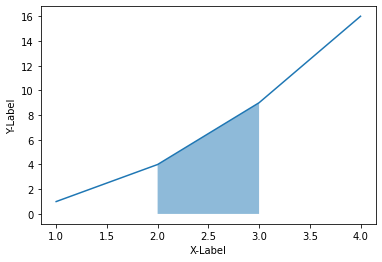

In [15]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

plt.plot(x, y)
plt.xlabel('X-Label')
plt.ylabel('Y-Label')
plt.fill_between(x[1:3], y[1:3], alpha=0.5)                   ## fill_between() 사용
x[1:3], y[1:3]
# 네 점 (x[1], y[1]), (x[2], y[2]), (x[1], 0), (x[2], 0)을 잇는 영역이 채워짐

plt.show()


### 연속형 확률변수의 확률의 성질
![](pic/확률성질.png)

- 첫 번째 성질 : 함수 f(x)는 0보다 크거나 같아야 한다.
    - 위 성질을 확인하기 위해서는 minimize_scalar 함수 사용
    - minimize_scalar(함수) : 함수를 실행한 결과값이 최소가되는 x값과 최소결과 y를 반환


In [17]:
from scipy.optimize import minimize_scalar

def func(x) :
    return (x-1.5) ** 2 + 0.5

res = minimize_scalar(func)
res.x # 최소값을 만들어낸 x값
res.fun  # 함수가 만들어 낼 수 있는 최소 값

func(1.5)

1.5

0.5

0.500

In [18]:
# 위에서 생성해 놓은 불공정 룰렛의 확률
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0


In [19]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.x
res.fun # 0 이 반환됬으므로 첫번째 확률의 성질을 만족


-1.6180339754913822

0

- 위 연산의 확인으로 인해 f(x)>=0 의 연속형 확률 변수의 성질이 만족 됨

####  연속형 확률변수의 두번째 확률의 성질
![](pic/확률성질2.png)

- 두번째 f(x)를 －∞ 부터 ∞ 까지 적분한 결과가 1이라는 것은 위 그림에서 삼각형의 면적이 1이 되는 것과 같다
    - 이 삼각형은 밑변의 길이가 1, 높이가 2 이므로 면적이 1이라는 것을 간단히 알 수 있음


### 확률의 두번째 성질을

- 두번째 f(x)를 －∞ 부터 ∞ 까지 적분한 결과가 1이라는 것은 위 그림에서 삼각형의 면적이 1이 되는 것과 같다
    - 이 삼각형은 밑변의 길이가 1, 높이가 2 이므로 면적이 1이라는 것을 간단히 알 수 있음

### quad() : 수치적분 함수

- **수치적분(numerical integration)**은 함수를 아주 작은 구간으로 나누어 실제 면적을 계산함으로써 정적분의 값을 구하는 방법이다. 
- Scipy의 integrate 서브패키지의 quad 명령으로 수치적분을 할 수 있다.

- 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
- 첫번째 반환값이 수치 적분으로 얻어진 결과이며, 두번째의 값은 추정 오차


In [21]:
# 두번째 성질을 적분 계산으로 확인
# -무한대와 +무한대는 np.inf로 표현할 수 있음 => np.inf : 무한대 , -np.inf : 마이너스 무한대
integrate.quad(f,-np.inf, np.inf)

(1.000, 0.000)

- 위 사다리꼴 영역을 적분으로 구하는 식
![](pic/적분식.png)

In [22]:
# 2x는 함수 f(x)가 구현하고 있음
integrate.quad(f,0.4,0.6)

# 적분 값이 0.200 이므로 0.4에서 0.6이 나타날 확률은 0.2

(0.200, 0.000)

### 누적 분포 함수

- X가 x이하가 될 때의 확률은 반환하는 함수
![](pic/누적분.png)

In [25]:
# 분포함수 구현

def F(x) :
    return integrate.quad(f, -np.inf, x)[0]

- 룰렛 0.4에서 0.6사이의 값을 취할 확률
![](pic/누적분2.png)

In [24]:
F(0.6) - F(0.4)

0.200

- 위 분포 함수 F(x)를 그래프로 그려보면 반드시 단조 증가함수(x가 증가할 때 y는 감소하지 않는 함수)가 됨


(-0.100, 1.100)

(-0.100, 1.100)

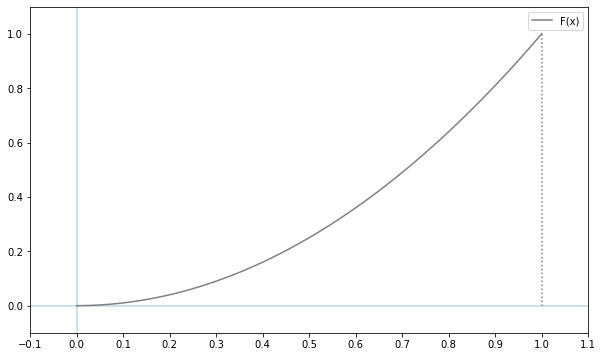

In [26]:
# 단조 증가 함수확인

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()


### 연속형 확률 분포의 지표

#### 평균 - 기대 값
![](pic/연속기대.png)

In [27]:
# 위에서 생성해 놓은 불공정 룰렛의 확률함수
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0


In [29]:
def integrand(x) : # (xf(x)) 계산 결과를 반환하는 함수
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [30]:
# 확률변수 X를 정의
X = [x_range, f]

In [36]:
def E(X, g=lambda x: x) :
    x_range, f = X
    def integrand(x) : # (xf(x)) 계산 결과를 반환하는 함수
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [37]:
E(X)

0.667

In [38]:
E(X, g=lambda x : 2*x+3)

4.333

### 분산
- μ 는 확률변수 X의 기대값

![](pic/분산.png)

In [39]:
# 확률 변수 X에 대한 분산 계산
mean = E(X) # 확률 변수 X에 대한 기대값

def integrand(x) :
    return (x-mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

![](pic/분산식2.png)
- 위 수식을 함수로 구현


In [42]:
def V(X, g=lambda x: x) : 
    x_range, f = X
    mean = E(X,g)
    
    def integrand(x) :
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]


In [43]:
V(X)

0.056

In [45]:
# 확률변환변수의 분산
V(X, lambda x: 2*x+3)

0.222

In [46]:
# 이산형 확률 변수에서 확인했던 분산의 성질은 연속형 확률 변수에도 적용
# 성질에 따라 아래 수식으로도 계산 가능
2**2*V(X)

0.222